# Indian Rainfall Analysis

The 2019 Indian floods were a series of floods that affected over thirteen states in late July and early August 2019, due to incessant rains. At least 200 people died and about a million people were displaced. Karnataka and Maharashtra were the most severely affected states.

It was the heaviest monsoon in the last 25 years. More than 1600 people died between June and October 2019.

Source: [Open Gov Data Platform India - data.gov.in](https://data.gov.in/resources/subdivision-wise-rainfall-and-its-departure-1901-2015)

India being an agriculturally driven economy, it will be interesting to study the rainfall in India in the past decade to give us an idea of the changes in the pattern if there are any.

Let us work on the INDIAN RAINFALL DATA!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Read the data

In [2]:
data = pd.read_csv('../data/rainfall in india 1901-2015.csv')

In [3]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


## Summary of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [5]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


## Inspecting the data, finding missing values and replacing them with appropriate values

In [6]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

**Approach used for replacing missing values:**

The data contains rainfall in mm in different regions at different times of a year, over a number of years. One method to fill in the missing values would be replacing each missing value with the mean of that particular column. But that would give us the mean rainfall over all regions for that particular month (feature).

Hence, here we will group the data as per regions or SUBDIVISIONS, we will consider the mean of each feature in this grouped data and we will use that mean to fill in the missing values in that respective feature. This will impute the missing values based upon the feature as well as the region, and will give more accurate values. 

In [7]:
#following function replaces missing values based upon the feature and subdivision

def fill_null(df, feature):
    """This function takes in the dataframe and the feature name in which the missing values are to be imputes, it grabs the 
    SUBDIVISION for the missing values, and replaces the missing values in the given feature with the mean of that feature 
    corresponding to the particular SUBDIVISION.
    
    Parameters:
    -----------
    df : pandas dataframe
    feature: str, string containing the name of the feature in which missing values are to be imputed
    
    Returns:
    -----------
    dataframe with filled in missing values
    """
    for i in df[df[feature].isnull() == True].index:
        for div in df.SUBDIVISION.unique():
            if df.iloc[i].SUBDIVISION == div:
                df[feature].iloc[i] = round(df.groupby(by='SUBDIVISION').mean()[feature].loc[div], 1)
        
    return df.head()

In [8]:
for col in data.columns.to_list():
    fill_null(data, col)

In [9]:
data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

All missing values have been imputed successfully.

## Ploting the mean annual rainfall and deriving insights

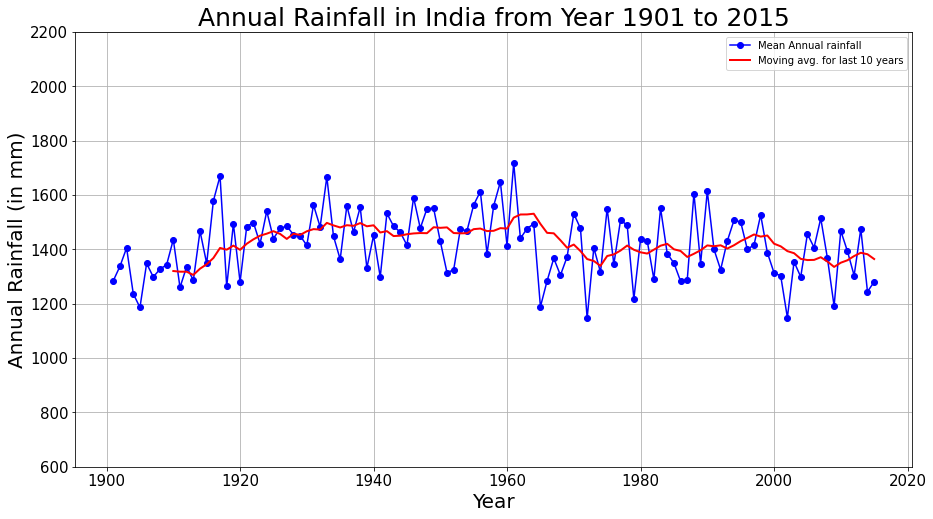

In [10]:
# Plotting the mean annual rainfall
ax = data.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(600,2200),color='b',marker='o',linestyle='-',figsize=(15,8),
                                                legend=True, label='Mean Annual rainfall')

# Finding the moving average taking into consideration a period of 10 years and plotting
data['MA10'] = data.groupby('YEAR').mean()['ANNUAL'].rolling(10).mean()

data.MA10.plot(color='r', linewidth=2, legend=True, label='Moving avg. for last 10 years' )

# Aesthetic of the plot
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall in India from Year 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

#### Insights:
* Highest average rainfall in India was recored in the year 1961. This was because in 1961 India received multiple cyclones. City of Pune was flooded in the year 1961 which is remembered as Panshet Flood.

* Year 1965-66 were twin drought years and there was food scarcity in India. Prime Minister Lal Bahadur Shastri gave the Slogan Jai Jawan Jai Kissan to people of India. This lead to green revolution in India making India a food surplus country in the coming decades.

* The red line is the 10 year moving average of the rainfall in India. It seems since 1960s there is slight dip in the rainfall in India. Now a days due to global warming the period of Monsoon season has shortned. We see more of erratic rainfall pattern. This needs more study.

## Analyzing the seasonal rainfall as per subdivisions

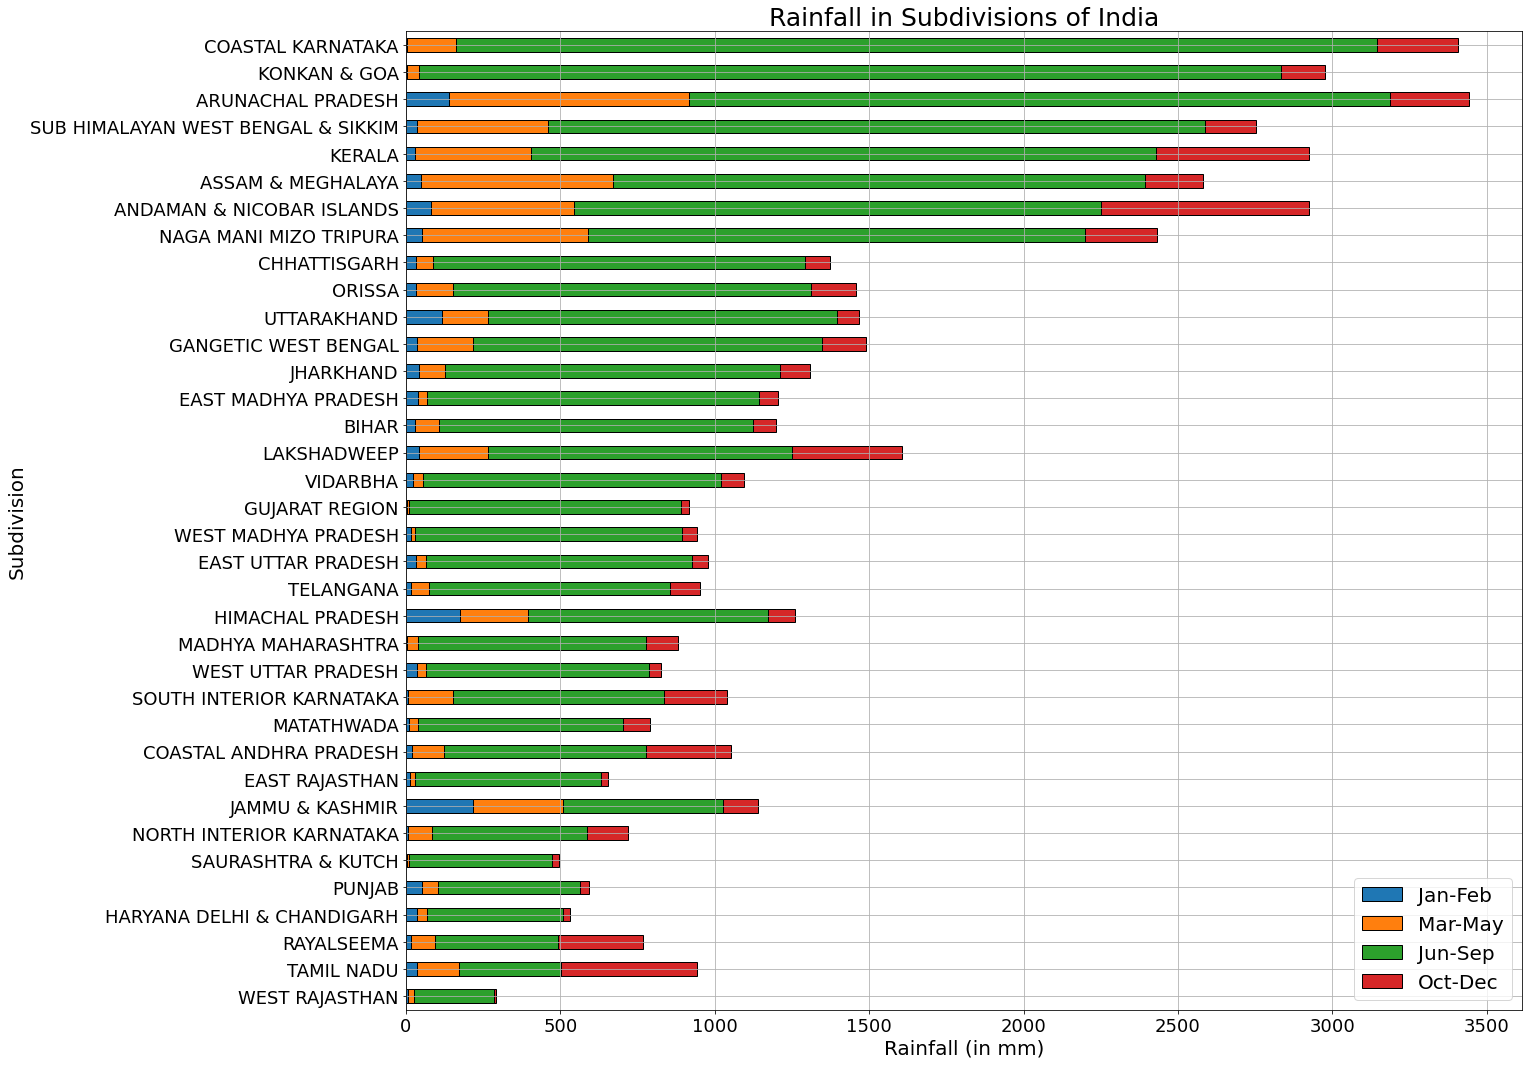

In [11]:
# Plotting a bar plot of the mean seasonal rainfall
(data[['SUBDIVISION', 'Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']]
 .groupby("SUBDIVISION").mean().sort_values('Jun-Sep')
 .plot
 .barh(width=0.5,
      edgecolor='k',
      align='center',
      stacked=True,figsize=(20,18)))

# Aesthetic of the plot
plt.xlabel('Rainfall (in mm)',fontsize=20)
plt.ylabel('Subdivision',fontsize=20)
plt.title('Rainfall in Subdivisions of India',fontsize=25)
plt.xticks(size=18)
plt.yticks(size=18)
plt.legend(loc=4, prop={'size':20})
plt.grid()
plt.ioff()

#### Insights:
* From the above graph we can see that majority of rainfall is received in the month of Jun-Sep which is the Monsoon season. Oct-Dec is time of return monsoon. Jan-Feb are the winter months during which least rainfall is observed in most regions, Mar-May is time for Summer rains in India.

* Coastal Karnataka, Arunachal Pradesh,Konkan Goa and Kerala receive highest rainfall.

* Rajastan, Gujrat, Haryana and Punjab receives low rainfall. 



## Analyzing the distribution of rainfall in various states

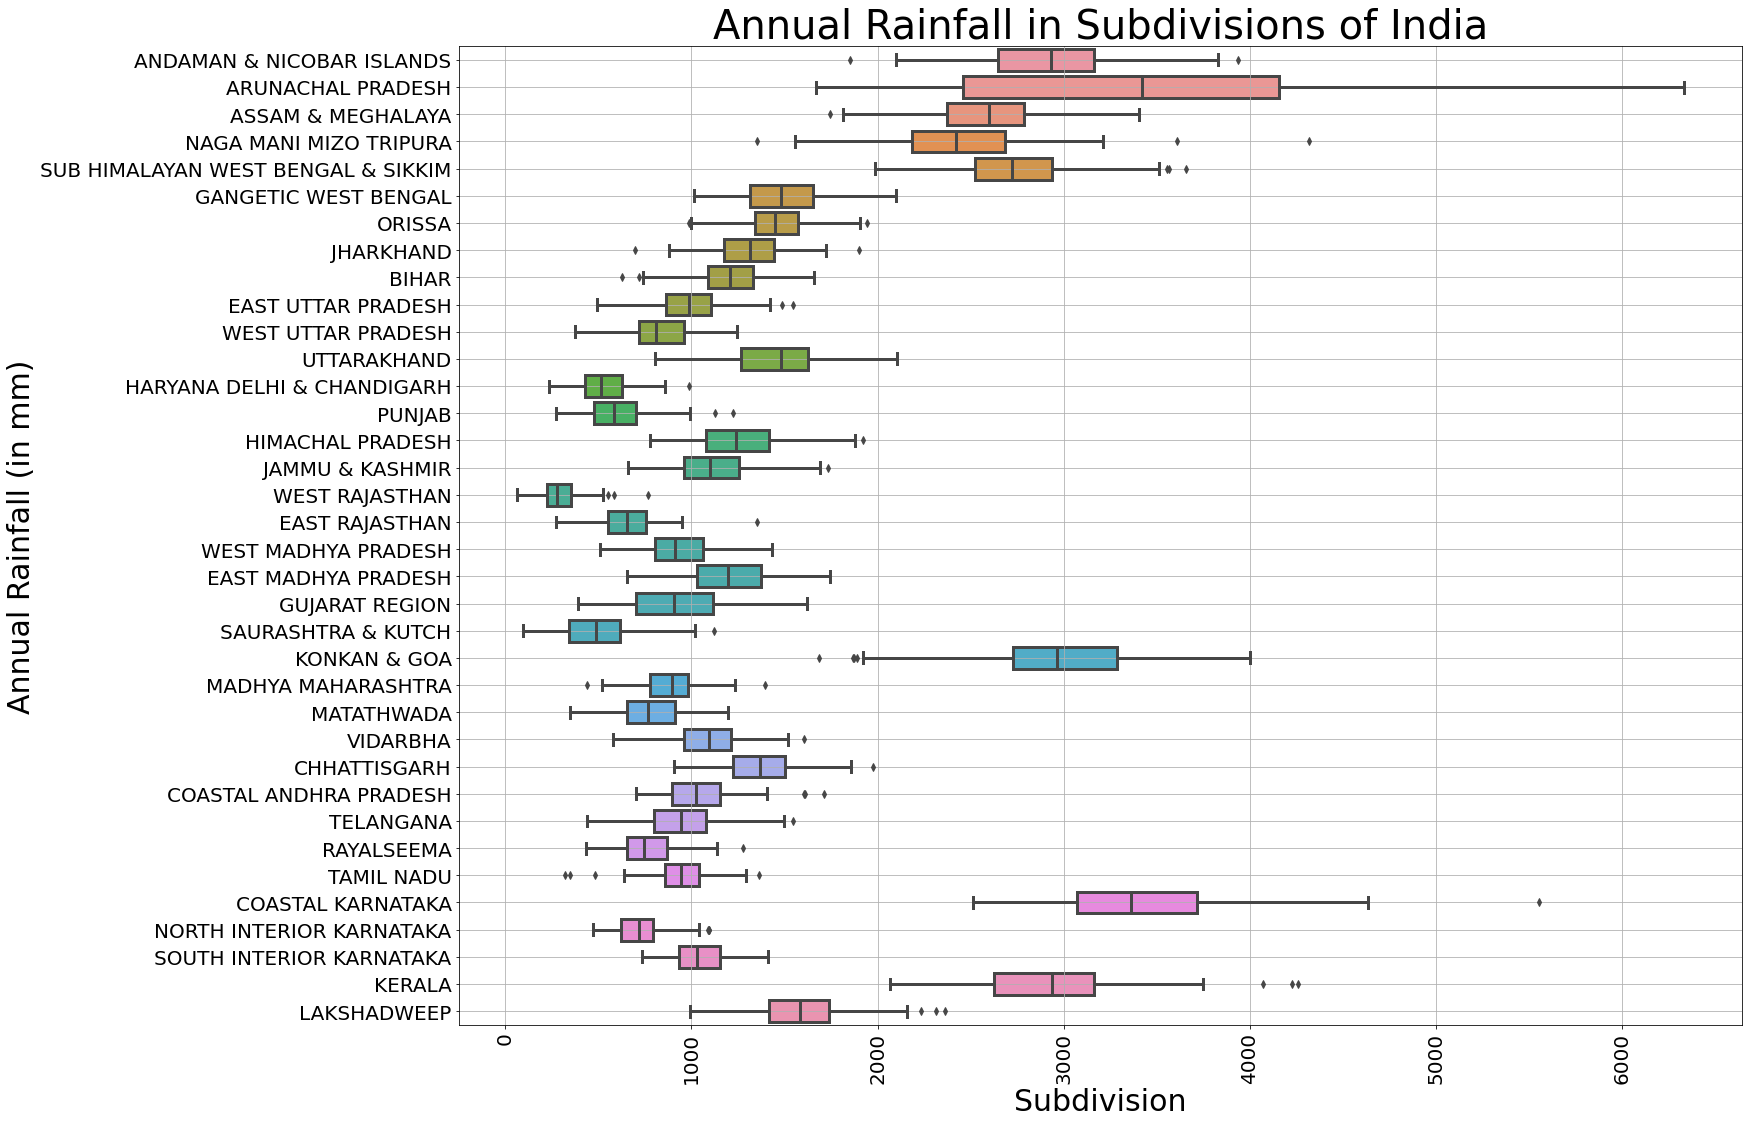

In [12]:
plt.rcParams['figure.figsize']=(23,18)

# Creating boxplot as per subdivsions
ax = sns.boxplot(y="SUBDIVISION", x="ANNUAL", data=data,width=0.8,linewidth=3)

# Aestehtics of the plot
ax.set_xlabel('Subdivision',fontsize=30)
ax.set_ylabel('Annual Rainfall (in mm)',fontsize=30)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)
ax.tick_params(axis='y',labelsize=20,rotation=0)
plt.grid()
plt.ioff()

#### Insights:

- We can see Subdivision Arunachal Pradesh shows highest highest difference between Maximum and Minimum rainfall received. 
- Costal Karnataka receives close to 3400 mm of Annual rainfall which is the highest in India. West Rajastan receives the least amount of rainfall.



## Analyzing the rainfall through years in Kerala 

In [13]:
# subset of the dataset contain data for the SUBDIVISION Kerala
Kerala = data[data.SUBDIVISION == 'KERALA']
Kerala.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MA10
3887,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1,NaN
3888,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2,NaN
3889,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1,NaN
3890,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3,NaN
3891,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1,NaN


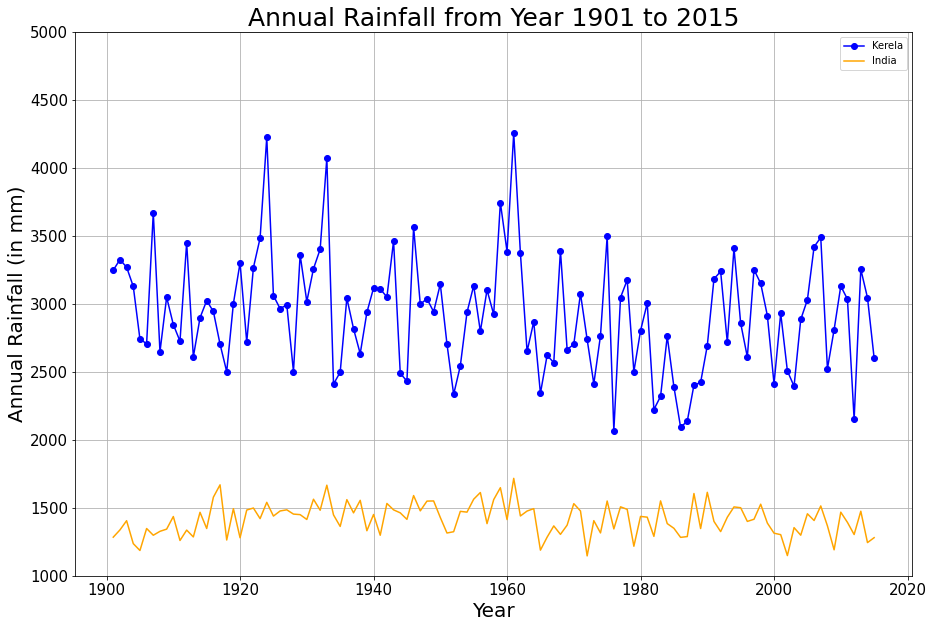

In [14]:
# Plotting the average annual rainfall 
ax=Kerala.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(1000,5000),color='b',marker='o',linestyle='-',figsize=(15,8), 
                                                legend=True, label='Kerela');

#plot for Annual Rainfall in all of India
data.groupby('YEAR').ANNUAL.mean().plot(figsize=(15,10), color='orange', legend=True, label='India')

# Setting up the aesthetics of the plot
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall from Year 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

#### Insights:

- Prior to 2018 Kerala had major flood in the year 1924 which is evident in the data. Contrary to popular belief Kerala received maximum annual rainfall in year 1961(4257 mm) and not 1924(4226 mm). In 2018 Kerala has received 2226.4 mm of rain in the monsoon season. This is 40% more than the average rainfall.
- The overall average Rainfall in Kerela throughout the years has been a lot higher than the average rainfall across India in those years.

## Reading the district wise rainfall data

In [15]:
Dist = pd.read_csv('../data/district wise rainfall normal.csv')

In [16]:
Dist.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


## Annual rainfall in different districts of Kerala

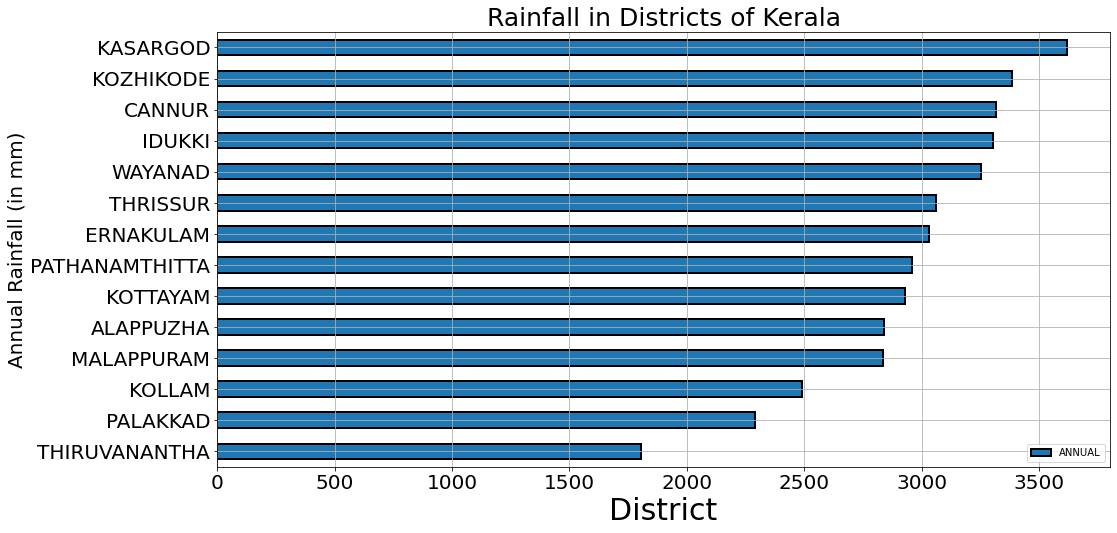

In [17]:
# subsetting the Kerala state data
KDist = Dist[Dist.STATE_UT_NAME == 'KERALA']
k = KDist.sort_values(by=['ANNUAL'])

# plotting a bar plot to check districwise rainfall in Kerala
ax=k.plot.barh(x='DISTRICT',y='ANNUAL',width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(16,8))

plt.xlabel('District',fontsize=30)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Rainfall in Districts of Kerala',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

## Finding out the districts with least rainfall

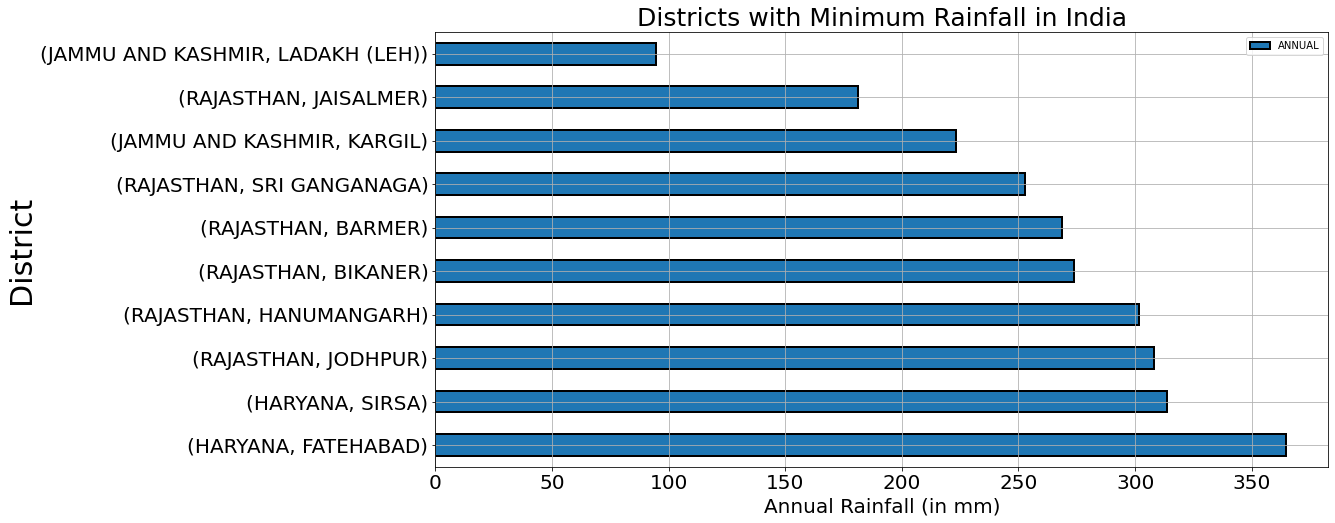

In [18]:
ax = (Dist
     .groupby(['STATE_UT_NAME', 'DISTRICT'])['ANNUAL']
     .mean()
     .sort_values(ascending=False)
     .tail(10)
     .plot
     .barh(align='center',edgecolor='k',linewidth=2,figsize=(16,8), legend=True))
     
plt.ylabel('District',fontsize=30)
plt.xlabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Districts with Minimum Rainfall in India',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

#### Insights:

- Ladak which is part of Jammu and Kashmir receives 94.6 mm. Ladak and Kargil which receive less rainfall are part of Indian State Jammu and Kashmir. Jaisalmer,Sri Ganganaga and Barmer are part of Rajastan State.



## Similarly, finding districts with maximum rainfall

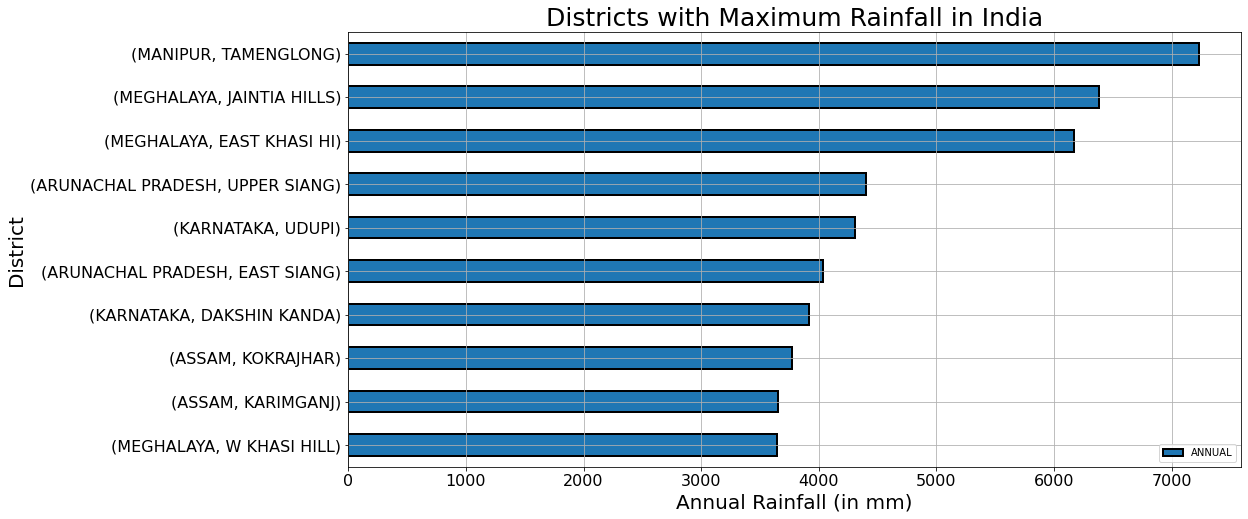

In [19]:
ax = (Dist
      .groupby(['STATE_UT_NAME', 'DISTRICT'])['ANNUAL']
      .mean()
      .sort_values(ascending=True)
      .tail(10)
      .plot
      .barh(align='center',edgecolor='k',linewidth=2,figsize=(16,8), legend=True))

plt.xlabel('Annual Rainfall (in mm)',fontsize=20)
plt.ylabel('District',fontsize=20)
plt.title('Districts with Maximum Rainfall in India',fontsize=25)
ax.tick_params(labelsize=16)
plt.grid()
plt.ioff()

**Insights:**

- Districts from North eastern states - Manipur, Meghalaya, Arunachal Pradesh and also Southern state of Karnataka receive maximum rainfall in India, with Tamenglong district from Manipur receiving the highest annual rainfall of more than 7000 mm.